In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
urineDS=pd.read_csv("/content/drive/MyDrive/Grad2/lastUrine.csv")
urineDS=urineDS.iloc[:,1:]

urineOutput=urineDS.iloc[2:,0:1]
urineInput=urineDS.iloc[2:,525:]

data = urineInput
scaler = StandardScaler()
scaler.fit(data)
urineInput=scaler.transform(data)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(urineInput, urineOutput, test_size=0.33, random_state=0)

In [ ]:
X_train=X_train.astype(np.float64)
X_test=X_test.astype(np.float64)
y_train=y_train.astype(np.float64)-1
y_test=y_test.astype(np.float64)-1

print(y_train)

     Metadata
231       1.0
20        1.0
169       0.0
254       1.0
126       0.0
..        ...
253       0.0
194       0.0
119       1.0
49        1.0
174       1.0

[201 rows x 1 columns]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten,concatenate

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import keras
from matplotlib import pyplot as plt

model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(8, 1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.25))
model.add(Conv1D(64, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/8
23/23 [==============================] - 0s 21ms/step - loss: 0.5011 - accuracy: 0.7611 - val_loss: 0.7356 - val_accuracy: 0.7143
Epoch 2/8
23/23 [==============================] - 0s 16ms/step - loss: 0.5095 - accuracy: 0.7667 - val_loss: 0.5657 - val_accuracy: 0.7619
Epoch 3/8
23/23 [==============================] - 1s 22ms/step - loss: 0.4867 - accuracy: 0.7722 - val_loss: 0.6695 - val_accuracy: 0.6190
Epoch 4/8
23/23 [==============================] - 1s 24ms/step - loss: 0.5141 - accuracy: 0.7333 - val_loss: 0.6520 - val_accuracy: 0.8095
Epoch 5/8
23/23 [==============================] - 0s 20ms/step - loss: 0.4985 - accuracy: 0.7667 - val_loss: 0.6631 - val_accuracy: 0.7619
Epoch 6/8
23/23 [==============================] - 1s 22ms/step - loss: 0.4579 - accuracy: 0.7722 - val_loss: 0.6257 - val_accuracy: 0.7143
Epoch 7/8
23/23 [==============================] - 1s 24ms/step - loss: 0.4713 - accuracy: 0.7889 - val_loss: 0.5533 - val_accuracy: 0.7619
Epoch 8/8
23/23 [===

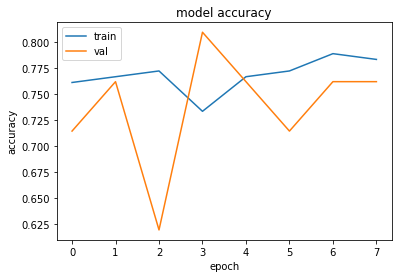

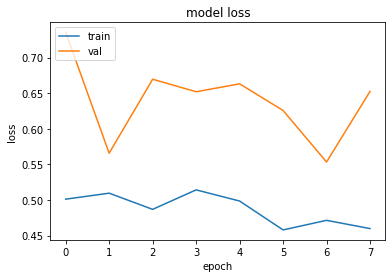

In [ ]:
history =model.fit(X_train,y_train, batch_size=8, epochs=8, validation_split=0.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
model.save('/content/drive/MyDrive/Grad2Models/genderClinic')

2.8.2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Grad2Models/genderClinic/assets


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Grad2Models/genderClinic', compile=False)

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 256)            1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 256)            196864    
                                                                 
 dropout (Dropout)           (None, 4, 256)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 256)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            65664     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    

In [ ]:
prediction=new_model.predict(X_test)
print(prediction)
for i in range (prediction.shape[0]):
  if prediction[i]< 0.5:
    prediction[i]=0
  else:
    prediction[i]=1  

yout=y_test.to_numpy()    
counter=0


for i in range (prediction.shape[0]):
  print("pred",prediction[i],"---- Real",yout[i])
  if prediction[i] == yout[i] :
    counter=counter+1


print("Accuracy is ",counter,"%")

[[5.90177774e-02]
 [6.07969761e-01]
 [8.33733201e-01]
 [1.23422265e-01]
 [1.75149202e-01]
 [6.21023476e-02]
 [6.99415207e-01]
 [3.94404620e-01]
 [7.40784109e-02]
 [8.94888341e-02]
 [7.68535852e-01]
 [6.57733500e-01]
 [4.87231582e-01]
 [8.11121464e-01]
 [2.52750516e-02]
 [4.01183307e-01]
 [3.52065444e-01]
 [1.28809810e-01]
 [6.38770878e-01]
 [7.65047133e-01]
 [7.35727787e-01]
 [4.12647337e-01]
 [5.18846512e-03]
 [5.89557111e-01]
 [6.06452584e-01]
 [1.84680790e-01]
 [5.54794550e-01]
 [7.06855178e-01]
 [8.38784695e-01]
 [7.00139642e-01]
 [1.56285763e-02]
 [1.07164085e-01]
 [7.30491340e-01]
 [8.19126964e-02]
 [5.67982495e-01]
 [4.09626961e-03]
 [5.05287945e-01]
 [8.01662683e-01]
 [2.37436950e-01]
 [6.33054376e-02]
 [2.31742859e-04]
 [6.30528688e-01]
 [1.10440254e-01]
 [1.27789766e-01]
 [5.96523821e-01]
 [2.12254256e-01]
 [8.34488869e-02]
 [6.98641658e-01]
 [7.86854148e-01]
 [3.75554532e-01]
 [6.16564035e-01]
 [6.84904575e-01]
 [7.57577002e-01]
 [6.68701589e-01]
 [8.23513627e-01]
 [7.676621

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
cm = confusion_matrix(yout, prediction)

Text(0.5, 12.5, 'Predicted label')

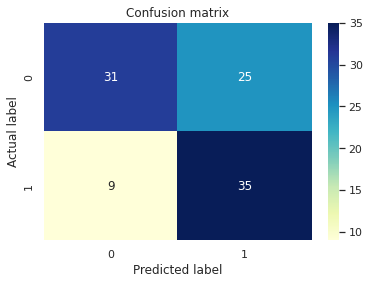

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yout,prediction))

              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62        56
         1.0       0.54      0.61      0.57        44

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.61      0.60      0.60       100



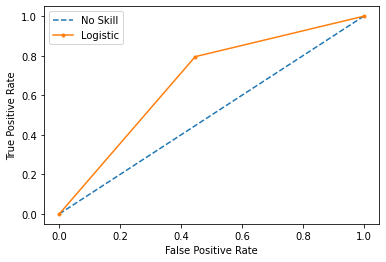

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(yout))]

ns_auc = roc_auc_score(yout, ns_probs)
lr_auc = roc_auc_score(yout, prediction)

ns_fpr, ns_tpr, _ = roc_curve(yout, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(yout, prediction)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()